In [10]:
import pandas as pd
import numpy as np

In [11]:
# Загружаем .csv файл в DataFrame:
df = pd.read_csv("titanic.csv", usecols=["Survived", "Pclass", "Name", "Sex", "Age", "Fare"])
df.head()

,Survived,Pclass,Name,Sex,Age,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,8.0500


# Постановка задачи

Хотим научиться предсказывать, выживет ли поссажир, исходя из его признаков

<Axes: >

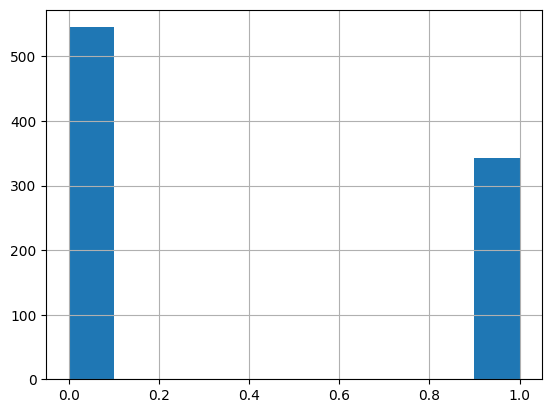

In [12]:
df["Survived"].hist(bins=10)

# Препроцессинг данных

Практически все модели работают только с числовыми признаками (фичами), поэтому все фичи необходимо перевести в int/float


In [13]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,8.0500


## Sex

In [14]:
pd.get_dummies(df["Sex"], prefix="Sex").head()

,Sex_female,Sex_male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [15]:
# Нам достаточно только одной колонки для бинарной фичи (для N-нарной достаточно N-1 колонок)
pd.get_dummies(df["Sex"], prefix="Sex", drop_first=True).head()

,Sex_male
0,True
1,False
2,False
3,False
4,True


In [16]:
df["Sex"] = pd.get_dummies(df["Sex"], drop_first=True)

In [17]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare
0,0,3,Mr. Owen Harris Braund,True,22.0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,False,38.0,71.2833
2,1,3,Miss. Laina Heikkinen,False,26.0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,False,35.0,53.1000
4,0,3,Mr. William Henry Allen,True,35.0,8.0500


## Name

In [18]:
# посчитаем самое простое - длину имени
df["Name_len"] = df["Name"].str.len()
df

,Survived,Pclass,Name,Sex,Age,Fare,Name_len
0,0,3,Mr. Owen Harris Braund,True,22.0,7.2500,22
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,False,38.0,71.2833,50
2,1,3,Miss. Laina Heikkinen,False,26.0,7.9250,21
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,False,35.0,53.1000,43
4,0,3,Mr. William Henry Allen,True,35.0,8.0500,23
...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,True,27.0,13.0000,20
883,1,1,Miss. Margaret Edith Graham,False,19.0,30.0000,27
884,0,3,Miss. Catherine Helen Johnston,False,7.0,23.4500,30
885,1,1,Mr. Karl Howell Behr,True,26.0,30.0000,20


### Задание 6.1



(**1 - 3 балла**) Добавьте еще новых фичей (по 1 за каждый балл, но не больше 3), добавьте их к обучению модели

In [19]:
df["Miss"] = df["Name"].str.contains("Miss").astype(int)
df["Mr"] = df["Name"].str.contains("Mr").astype(int)
df["Mrs"] = df["Name"].str.contains("Mrs").astype(int)
df

,Survived,Pclass,Name,Sex,Age,Fare,Name_len,Miss,Mr,Mrs
0,0,3,Mr. Owen Harris Braund,True,22.0,7.2500,22,0,1,0
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,False,38.0,71.2833,50,0,1,1
2,1,3,Miss. Laina Heikkinen,False,26.0,7.9250,21,1,0,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,False,35.0,53.1000,43,0,1,1
4,0,3,Mr. William Henry Allen,True,35.0,8.0500,23,0,1,0
...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,True,27.0,13.0000,20,0,0,0
883,1,1,Miss. Margaret Edith Graham,False,19.0,30.0000,27,1,0,0
884,0,3,Miss. Catherine Helen Johnston,False,7.0,23.4500,30,1,0,0
885,1,1,Mr. Karl Howell Behr,True,26.0,30.0000,20,0,1,0


# Разбиваем данные на train и test

In [3]:
# !pip install scikit-learn
# тут устанавливали scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f1/7d/2e562207176a5dcdad513085670674bb11ffaf37e1393eacb6d7fb502481/scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/81/d7/d2537d51efb692d0c411e64267ba349e7668d40f5bc73cefe78ccd650dcd/scipy-1.11.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 401.3 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.w

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [22]:
len(df), len(df_train), len(df_test)

(887, 709, 178)

In [21]:
df

,Survived,Pclass,Name,Sex,Age,Fare,Name_len,Miss,Mr,Mrs
0,0,3,Mr. Owen Harris Braund,True,22.0,7.2500,22,0,1,0
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,False,38.0,71.2833,50,0,1,1
2,1,3,Miss. Laina Heikkinen,False,26.0,7.9250,21,1,0,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,False,35.0,53.1000,43,0,1,1
4,0,3,Mr. William Henry Allen,True,35.0,8.0500,23,0,1,0
...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,True,27.0,13.0000,20,0,0,0
883,1,1,Miss. Margaret Edith Graham,False,19.0,30.0000,27,1,0,0
884,0,3,Miss. Catherine Helen Johnston,False,7.0,23.4500,30,1,0,0
885,1,1,Mr. Karl Howell Behr,True,26.0,30.0000,20,0,1,0


# Метрики

In [23]:
from numpy.typing import ArrayLike


def accuracy(y_true: ArrayLike, y_pred: ArrayLike) -> float:
  return sum(y_true == y_pred) / len(y_true)

### Задание 6.2

Реализуйте следующие метрики:
- (**1 балл**) Recall и Precision
- (**1 балл**) F1-score с вызовом Recall и Precision внутри (**+1 балл**, если вместо F1-score будет реализована общая метрика F-score, а по умолчанию использоваться beta=1)


In [24]:
def accuracy(y_true: ArrayLike, y_pred: ArrayLike) -> float:
    return sum(y_true == y_pred)/len(y_true)

def recall(y_true, y_pred) -> float: 
    return sum(y_true == y_pred)/len(y_true)

def precision(y_true: ArrayLike, y_pred: ArrayLike) -> float:
    return sum(y_true == y_pred)/len(y_true)


def f_score (y_true: ArrayLike, y_pred: ArrayLike, beta: int = 1.0) -> float:
    recall_val = recall(y_true, y_pred)
    precicison_val = recall(y_true, y_pred)
    return (1 + beta * beta) * ((precicison_val * recall) / ((beta * beta * precision) + recall))
    



# Обучаем модель

In [25]:
# выбираем колонки, которые будем использовать в качестве фичей и таргета
features = ["Pclass", "Sex", "Age", "Fare", "Name_len"]
target = "Survived"

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
# объявляем модель (можно менять параметры, читайте доку)
model = LogisticRegression(random_state=42)

In [28]:
# обучаем модель
model.fit(X=df_train[features], y=df_train[target])

LogisticRegression(random_state=42)

In [29]:
# делаем предсказания
df_train["predict"] = model.predict(df_train[features])
df_test["predict"] = model.predict(df_test[features])

## Считаем метрики

In [30]:
# train set
accuracy(y_true=df_train["Survived"], y_pred=df_train["predict"])

0.8124118476727785

In [31]:
# test set
accuracy(y_true=df_test["Survived"], y_pred=df_test["predict"])

0.7584269662921348

### Задание 6.3

(**3 балла**) Получите значение accuracy выше, чем текущее на этом же test-сете. Для этого можете добавлять новые фичи, удалять старые, менять параметры модели и т.д., но не перемешивайте данные

## Влияние фичей

Для небольших моделей с малым количеством весов (линейные модели, логистическая регрессия) можно смотреть на вес при каждом признаке<br>Чем вес по модулю больше - тем важнее фича, а знак отвечает за то, в положительную или отрицательную сторону признак двигает таргет

In [32]:
from typing import Any
from matplotlib import pyplot as plt


# подходит для некоторых функций из sklearn-а, если хотите использовать другие модели - нужно написать кастомную функцию
def plot_feat_importance(model: Any, abs_coefs: bool = True):
  coefficients = model.coef_
  importance = np.abs(model.coef_)[0] if abs_coefs else model.coef_[0]
  feature_importance = pd.DataFrame({'feature': features, 'importance': importance, 'abs_importance': np.abs(importance)})
  feature_importance = feature_importance.sort_values('abs_importance', ascending=True)
  feature_importance.plot(x='feature', y='importance', kind='barh', figsize=(7, 4))
  plt.show()


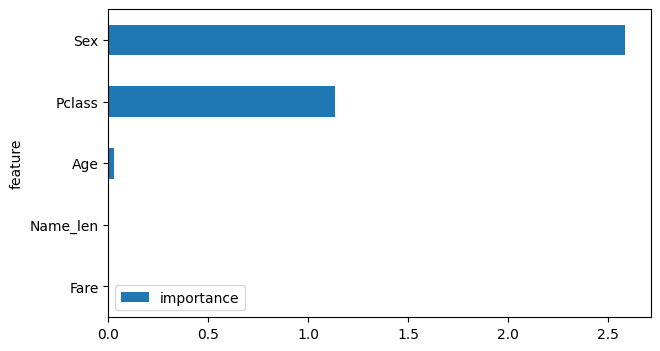

In [33]:
# в абсолютах
plot_feat_importance(model=model, abs_coefs=True)

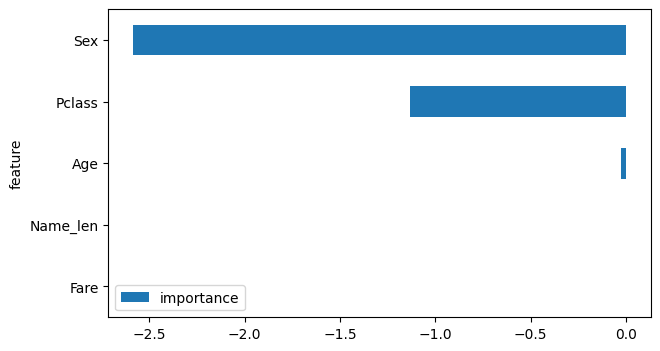

In [34]:
# не в абсолютах
plot_feat_importance(model=model, abs_coefs=False)

In [35]:
df_train.groupby(["Sex"])["Survived"].mean()

Sex
False    0.750958
True     0.176339
Name: Survived, dtype: float64

In [36]:
df_train.groupby(["Pclass"])["Survived"].mean()

Pclass
1    0.641176
2    0.489655
3    0.241117
Name: Survived, dtype: float64

### Задание 6.4

(**до 5 баллов**) Найдите (или соберите) новый датасет, в котором решаемую задачу можно свести к отличной от бинарной классификации. И проделайте все те же самые действия, а именно:
- Изучите данные
- Сформулируйте задачу
- Обработайте данные и проведите feature-engineering
- Разбейте данные на train и test
- Подберите и реализуйте метрики
- Подберите и обучите модель
- Замерьте качество получившейся модели
- Посмотрите на влияние отдельных признаков (если используете более сложные моделе, то можете использовать библиотеку [SHAP](https://shap.readthedocs.io/en/latest/))

In [17]:
#задание что-то не получается :(

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import r2_score

# Загрузка данных
df = pd.read_csv('titanic.csv')

# Обработка пропущенных значений
df = df.dropna()

# Преобразование категориальных переменных
encoder = OneHotEncoder(sparse=False)
df_encoded = encoder.fit_transform(df)


c:\Users\Валерия Савина\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
data = load_breast_cancer()

X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=1)
clf.fit(X_train, y_train)




RandomForestClassifier(random_state=1)

In [14]:
#оценка модели
y_pred = clf.predict(X_test)


In [18]:
# Подбор и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)


NameError: name 'LinearRegression' is not defined

In [19]:
# Измерение качества получившейся модели
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2_score(y_test, y_pred))

NameError: name 'model' is not defined